In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [8]:
categories = None
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
X, y = newsgroups.data, newsgroups.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# 図を廃棄
_ = model.fit(X_train, y_train)

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, log_loss, cohen_kappa_score,
    matthews_corrcoef, top_k_accuracy_score,
    classification_report, roc_curve, auc, roc_auc_score
)
import numpy as np

def evaluate_multiclass_model(
    y_test,
    y_pred,
    y_score,
    class_names,
    top_k=3,
    show_roc=True,
    show_report=True
):
    """
    Evaluate a multi-class classification model using common metrics and optional visualizations.

    Parameters:
    - y_test: True labels (integers)
    - y_pred: Predicted labels (integers)
    - y_score: Predicted class probabilities (shape: [n_samples, n_classes])
    - class_names: List of class names (strings)
    - top_k: Value of k for Top-k Accuracy (default: 3)
    - show_roc: Whether to display the ROC curves (default: True)
    - show_report: Whether to print the classification report (default: True)
    """

    n_classes = len(class_names)
    y_test_bin = label_binarize(y_test, classes=range(n_classes))

    print("=== Evaluation Metrics (Numerical) ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Log Loss: {log_loss(y_test, y_score):.4f}")
    print(f"Cohen's Kappa: {cohen_kappa_score(y_test, y_pred):.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {matthews_corrcoef(y_test, y_pred):.4f}")
    print(f"Top-{top_k} Accuracy: {top_k_accuracy_score(y_test, y_score, k=top_k):.4f}")
    macro_auc = roc_auc_score(y_test_bin, y_score, average="macro")
    print(f"Macro-average AUC: {macro_auc:.4f}")

    if show_report:
        print("\n=== Classification Report ===")
        print(classification_report(y_test, y_pred, target_names=class_names))

    if show_roc:
        print("\n=== ROC Curves (One-vs-Rest) ===")
        plt.figure(figsize=(10, 8))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curves (One-vs-Rest)")
        plt.legend(loc="lower right", fontsize='small')
        plt.grid()
        plt.show()


=== Evaluation Metrics (Numerical) ===
Accuracy: 0.8475
Log Loss: 0.9905
Cohen's Kappa: 0.8393
Matthews Correlation Coefficient (MCC): 0.8412
Top-3 Accuracy: 0.9464
Macro-average AUC: 0.9908

=== Classification Report ===
                          precision    recall  f1-score   support

             alt.atheism       0.85      0.74      0.79       151
           comp.graphics       0.88      0.80      0.84       202
 comp.os.ms-windows.misc       0.89      0.81      0.85       195
comp.sys.ibm.pc.hardware       0.63      0.86      0.72       183
   comp.sys.mac.hardware       0.96      0.83      0.89       205
          comp.windows.x       0.96      0.82      0.89       215
            misc.forsale       0.96      0.62      0.75       193
               rec.autos       0.88      0.93      0.90       196
         rec.motorcycles       0.89      0.95      0.92       168
      rec.sport.baseball       0.96      0.95      0.95       211
        rec.sport.hockey       0.91      0.98      

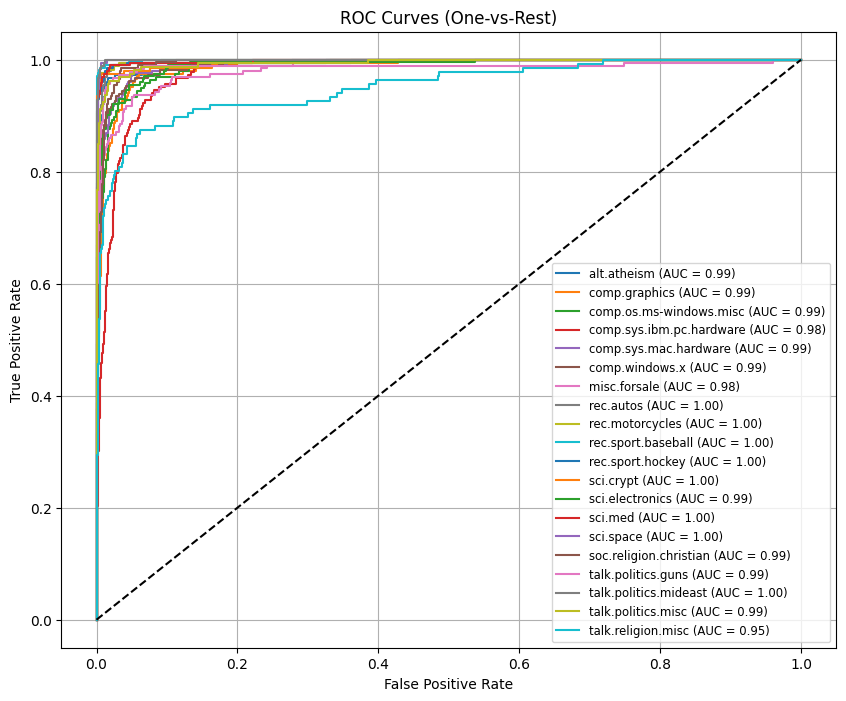

In [10]:
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)

evaluate_multiclass_model(
    y_test=y_test,
    y_pred=y_pred,
    y_score=y_score,
    class_names=newsgroups.target_names
)
